In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# 1.파일 읽기

In [2]:
PL = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/England-Premier-League"
L1 = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/France-Ligue-1"
GB = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/Germany-Bundesliga"
SA = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/Italy-Serie-A"
LL = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/Spain-LaLiga"

In [3]:
PL_PLAYER_STATS = f'{PL}/22-23_players_stats-cleaned.csv'
L1_PLAYER_STATS = f'{L1}/22-23_players_stats-cleaned.csv'
GB_PLAYER_STATS = f'{GB}/22-23_players_stats-cleaned.csv'
SA_PLAYER_STATS = f'{SA}/22-23_players_stats-cleaned.csv'
LL_PLAYER_STATS = f'{LL}/22-23_players_stats-cleaned.csv'

PL_TEAM_STATS = f'{PL}/22-23_teams_stats-cleaned.csv'
L1_TEAM_STATS = f'{L1}/22-23_teams_stats-cleaned.csv'
GB_TEAM_STATS = f'{GB}/22-23_teams_stats-cleaned.csv'
SA_TEAM_STATS = f'{SA}/22-23_teams_stats-cleaned.csv'
LL_TEAM_STATS = f'{LL}/22-23_teams_stats-cleaned.csv'

PL_PLAYER_VALUES = f'{PL}/22-23_players_values-cleaned.csv'
L1_PLAYER_VALUES = f'{L1}/22-23_players_values-cleaned.csv'
GB_PLAYER_VALUES = f'{GB}/22-23_players_values-cleaned.csv'
SA_PLAYER_VALUES = f'{SA}/22-23_players_values-cleaned.csv'
LL_PLAYER_VALUES = f'{LL}/22-23_players_values-cleaned.csv'

PL_TEAM_VALUES = f'{PL}/22-23_teams_values-cleaned.csv'
L1_TEAM_VALUES = f'{L1}/22-23_teams_values-cleaned.csv'
GB_TEAM_VALUES = f'{GB}/22-23_teams_values-cleaned.csv'
SA_TEAM_VALUES = f'{SA}/22-23_teams_values-cleaned.csv'
LL_TEAM_VALUES = f'{LL}/22-23_teams_values-cleaned.csv'

In [4]:
pl_player_stats_df = pd.read_csv(PL_PLAYER_STATS)
l1_player_stats_df = pd.read_csv(L1_PLAYER_STATS)
gb_player_stats_df = pd.read_csv(GB_PLAYER_STATS)
sa_player_stats_df = pd.read_csv(SA_PLAYER_STATS)
ll_player_stats_df = pd.read_csv(LL_PLAYER_STATS)

pl_team_stats_df = pd.read_csv(PL_TEAM_STATS)
l1_team_stats_df = pd.read_csv(L1_TEAM_STATS)
gb_team_stats_df = pd.read_csv(GB_TEAM_STATS)
sa_team_stats_df = pd.read_csv(SA_TEAM_STATS)
ll_team_stats_df = pd.read_csv(LL_TEAM_STATS)

pl_player_values_df = pd.read_csv(PL_PLAYER_VALUES)
l1_player_values_df = pd.read_csv(L1_PLAYER_VALUES)
gb_player_values_df = pd.read_csv(GB_PLAYER_VALUES)
sa_player_values_df = pd.read_csv(SA_PLAYER_VALUES)
ll_player_values_df = pd.read_csv(LL_PLAYER_VALUES)

pl_team_values_df = pd.read_csv(PL_TEAM_VALUES)
l1_team_values_df = pd.read_csv(L1_TEAM_VALUES)
gb_team_values_df = pd.read_csv(GB_TEAM_VALUES)
sa_team_values_df = pd.read_csv(SA_TEAM_VALUES)
ll_team_values_df = pd.read_csv(LL_TEAM_VALUES)

In [5]:
# 선수 데이터프레임 병합
players_df = pd.concat([
    pd.read_csv(PL_PLAYER_STATS),
    # pd.read_csv(L1_PLAYER_STATS),
    # pd.read_csv(GB_PLAYER_STATS),
    # pd.read_csv(SA_PLAYER_STATS),
    pd.read_csv(LL_PLAYER_STATS)
], ignore_index=True)

# 팀 데이터프레임 병합
teams_df = pd.concat([
    pd.read_csv(PL_TEAM_STATS),
    # pd.read_csv(L1_TEAM_STATS),
    # pd.read_csv(GB_TEAM_STATS),
    # pd.read_csv(SA_TEAM_STATS),
    pd.read_csv(LL_TEAM_STATS)
], ignore_index=True)

# 2.포지션별로 각 리그의 top3 팀선수들 선택

In [6]:
# def group_top_teams_by_position(player_df, team_df):
#     team_df['Pts'] = pd.to_numeric(team_df['Pts'])
#     top_teams = team_df.nlargest(3, 'Pts')['team_name'].tolist()
    
#     top_teams_df = player_df[player_df['team_name'].isin(top_teams)].copy()
#     top_teams_df.loc[:, 'positions'] = top_teams_df[['position_1', 'position_2', 'position_3', 'position_4', 'position_5']].apply(
#         lambda x: [pos.strip() for pos in x if pd.notna(pos)], axis=1
#     )
    
#     all_positions = set(pos for positions in top_teams_df['positions'] for pos in positions)
#     position_groups = {pos: [] for pos in all_positions}
    
#     for _, row in top_teams_df.iterrows():
#         player_name = row['player_name']
#         player_positions = row['positions']
        
#         for pos in player_positions:
#             position_groups[pos].append(player_name)
    
#     return position_groups


# position_groups = group_top_teams_by_position(pl_player_stats_df, pl_team_stats_df)
# del position_groups['GK']

# for key, value in position_groups.items():
#     print(key, value)

In [7]:
def group_top_teams_by_position(player_dfs, team_dfs):
    player_df = pd.concat(player_dfs, ignore_index=True)
    team_df = pd.concat(team_dfs, ignore_index=True)
    
    team_df['Pts'] = pd.to_numeric(team_df['Pts'])
    top_teams = team_df.nlargest(15, 'Pts')['team_name'].tolist()
    print(top_teams)
    
    top_teams_df = player_df[player_df['team_name'].isin(top_teams)].copy()
    top_teams_df.loc[:, 'positions'] = top_teams_df[['position_1', 'position_2', 'position_3', 'position_4', 'position_5']].apply(
        lambda x: [pos.strip() for pos in x if pd.notna(pos)], axis=1)
    
    all_positions = set(pos for positions in top_teams_df['positions'] for pos in positions)
    position_groups = {pos: [] for pos in all_positions}
    
    for _, row in top_teams_df.iterrows():
        player_name = row['player_name']
        player_positions = row['positions']
        
        for pos in player_positions:
            position_groups[pos].append(player_name)
    
    return position_groups, top_teams

player_dfs = [pl_player_stats_df, l1_player_stats_df, gb_player_stats_df, sa_player_stats_df, ll_player_stats_df]
team_dfs = [pl_team_stats_df, l1_team_stats_df, gb_team_stats_df, sa_team_stats_df, ll_team_stats_df]

position_groups, top_teams = group_top_teams_by_position(player_dfs, team_dfs)
del position_groups['GK']

['Napoli', 'Manchester City', 'Barcelona', 'Paris Saint-Germain', 'Arsenal', 'Lens', 'Real Madrid', 'Atletico Madrid', 'Manchester United', 'Lazio', 'Marseille', 'Inter', 'Newcastle', 'Bayern Munich', 'Borussia Dortmund']


In [8]:
for key, value in position_groups.items():
    print(key, value)

LB ['Kieran Trippier', 'Bukayo Saka', 'João Cancelo', 'Granit Xhaka', 'Diogo Dalot', 'Aaron Wan-Bissaka', 'Luke Shaw', 'Oleksandr Zinchenko', 'Lisandro Martínez', 'Dan Burn', 'Nathan Aké', 'Victor Lindelöf', 'Aymeric Laporte', 'Tyrell Malacia', 'Jakub Kiwior', 'Manuel Akanji', 'Matt Targett', 'Takehiro Tomiyasu', 'Kieran Tierney', 'Sergio Gómez', 'Javier Manquillo', 'Matt Ritchie', 'Cédric Soares', 'Jamal Lewis', 'Nuno Mendes', 'Achraf Hakimi', 'Nuno Tavares', 'Chancel Mbemba', 'Facundo Medina', 'Sead Kolasinac', 'Juan Bernat', 'Massadio Haïdara', 'Pablo Sarabia', 'Ramy Bensebaïni', 'Nico Elvedi', 'Danilo Soares', 'Konstantinos Stafylidis', 'Joe Scally', 'Dominique Heintz', 'Luca Netz', 'Gerrit Holtmann', 'Jannes Horn', 'Mário Rui', 'Giovanni Di Lorenzo', 'Federico Dimarco', 'Amir Rrahmani', 'Alessio Romagnoli', 'Juan Jesus', 'Adam Marusic', 'Mathías Olivera', 'Matteo Darmian', 'Elseid Hysaj', 'Bartosz Bereszynski', "Danilo D'Ambrosio", 'Robin Gosens', 'Luca Pellegrini', 'Stefan Radu',

# 3.포지션별 스탯 평균치 구하기

In [9]:
def safe_normalize(x):
    range = x.max() - x.min()
    if range == 0:
        return x  # 변화 없이 반환
    else:
        return (x - x.min()) / range

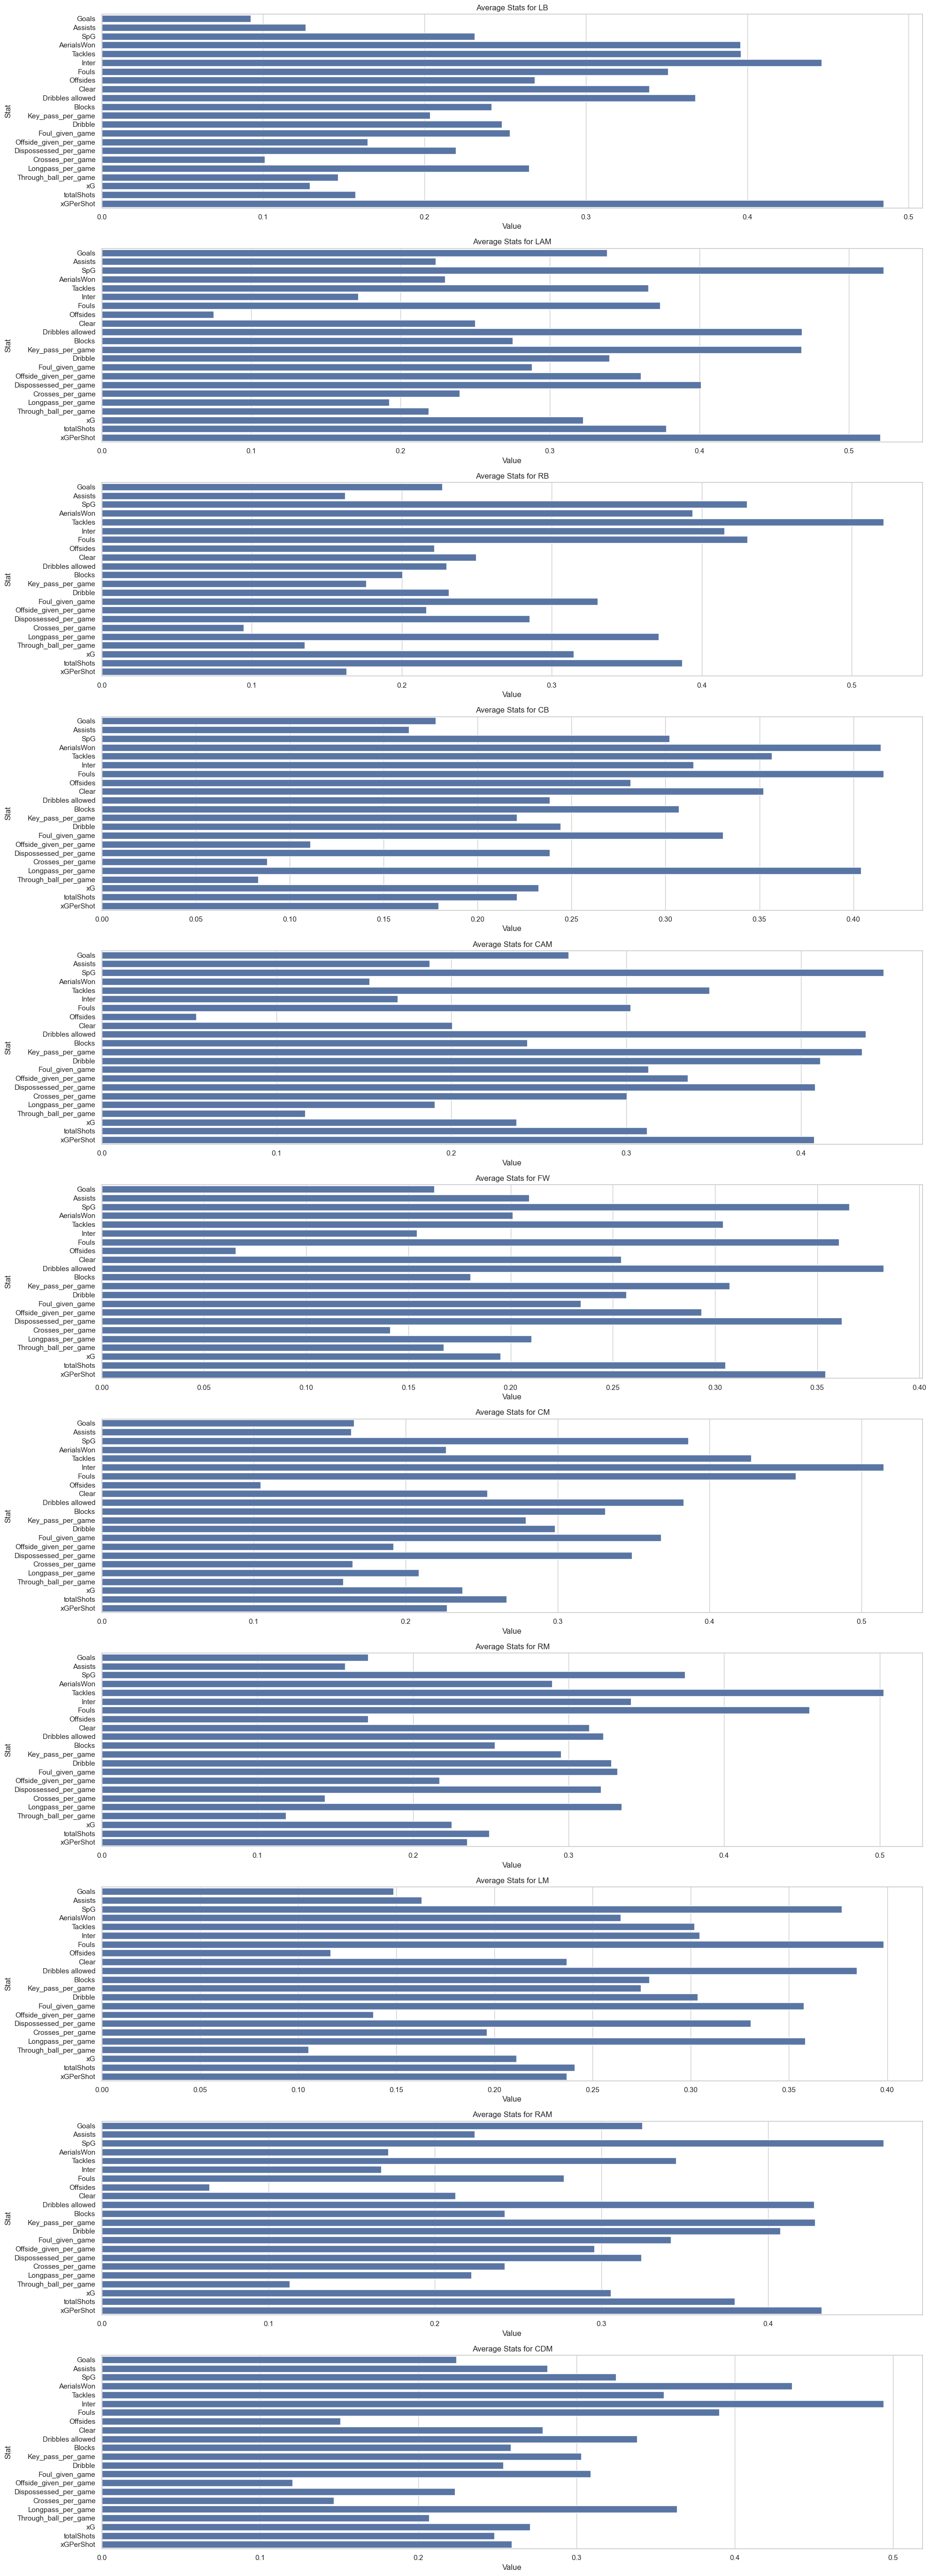

In [10]:
ignore_columns = [
    'age',
    'Apps',
    'Mins',
    'Rating',
    'Yel',
    'Red',
    'MoM',
    'OwnGoal',
    'Unsuccessful touches',
    'Average_per_pass',
    'xGDiff',
    'xGPerNinety',
    'PS%'
]

fig, axes = plt.subplots(len(position_groups), 1, figsize=(20, 5 * len(position_groups)))

for ax, (position, players) in zip(axes, position_groups.items()):
    position_df = players_df[players_df['player_name'].isin(players)]
    position_df = position_df.drop(columns=ignore_columns)
    
    numeric_cols = position_df.select_dtypes(include=[float, int]).columns
    position_df[numeric_cols] = position_df[numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0).apply(lambda x: x/x.max(), axis=0)

    mean_stats = position_df.mean(numeric_only=True).reset_index()
    mean_stats.columns = ['Stat', 'Value']
    
    sns.barplot(x='Value', y='Stat', data=mean_stats, ax=ax)
    ax.set_title(f"Average Stats for {position}")

plt.tight_layout()
plt.show()

# 4.스탯의 평균값들과 4위 이하의 팀 선수들의 차이 측정

In [11]:
def calculate_position_stats(position_df, ignore_columns):
    position_df = position_df.drop(columns=ignore_columns)
    numeric_cols = position_df.select_dtypes(include=[float, int]).columns
    position_df[numeric_cols] = position_df[numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0).apply(lambda x: x / x.max(), axis=0)
    return position_df.mean(numeric_only=True)

In [12]:
top_teams_stats = {}
for position, players in position_groups.items():
    position_df = players_df[players_df['player_name'].isin(players)]
    top_teams_stats[position] = calculate_position_stats(position_df, ignore_columns)

# 4위 이하 팀의 선수들 처리
other_teams = teams_df[~teams_df['team_name'].isin(top_teams)]['team_name'].tolist()
other_teams_df = players_df[players_df['team_name'].isin(other_teams)].copy()

other_teams_stats = {}
for position in top_teams_stats.keys():
    position_df = other_teams_df[other_teams_df['position'].str.contains(position, na=False)]
    other_teams_stats[position] = calculate_position_stats(position_df, ignore_columns)

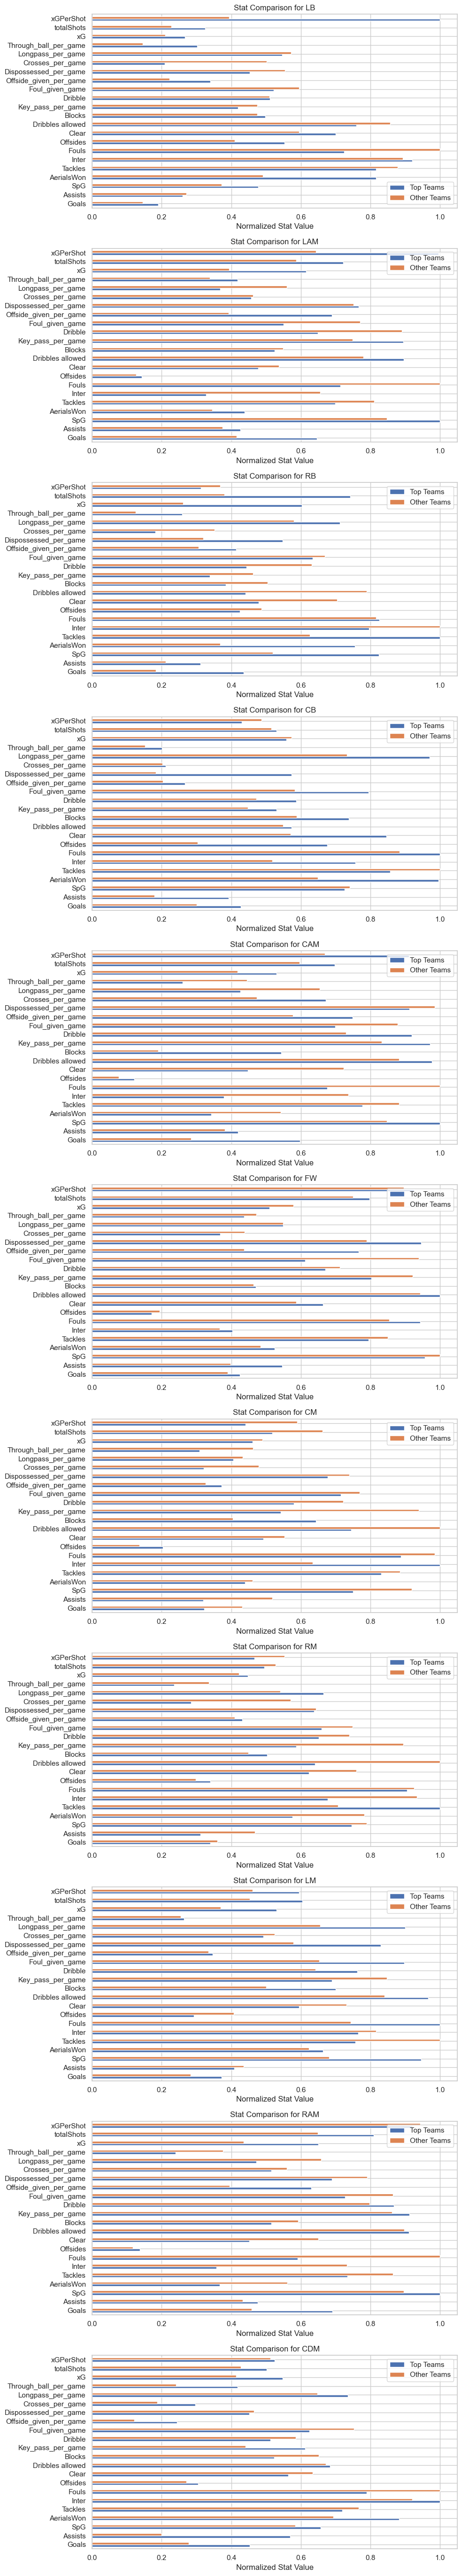

In [13]:
def plot_comparison_stats(top_stats, other_stats, positions):
    fig, axes = plt.subplots(len(positions), 1, figsize=(10, 5 * len(positions)))
    
    for ax, position in zip(axes, positions):
        top_position_stats = top_stats.get(position, pd.Series(dtype=float))
        other_position_stats = other_stats.get(position, pd.Series(dtype=float))
        
        comparison_df = pd.DataFrame({
            'Top Teams': top_position_stats,
            'Other Teams': other_position_stats
        })

        comparison_df.fillna(0, inplace=True)
        comparison_df = comparison_df / comparison_df.max()

        comparison_df.plot(kind='barh', ax=ax)
        ax.set_title(f'Stat Comparison for {position}')
        ax.set_xlabel('Normalized Stat Value')
    
    plt.tight_layout()
    plt.show()


plot_comparison_stats(top_teams_stats, other_teams_stats, position_groups.keys())

In [14]:
other_teams_df.head()

,player_name,team_name,age,position,Apps,Mins,Goals,Assists,Yel,Red,...,xGDiff,xGPerNinety,totalShots,xGPerShot,position_1,position_2,position_3,position_4,position_5,position_6
0,Asmir Begovic,Everton,36,GK,1,90,0,0,0,0,...,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN
4,Harry Kane,Tottenham,30,"CAM, FW",38,3408,30,3,6,0,...,7.51,0.59,130.0,0.17,CAM,FW,NaN,NaN,NaN,NaN
9,Solly March,Brighton,29,"CM, LM, RM",31(2),2728,7,7,2,0,...,-2.31,0.31,74.0,0.13,CM,LM,RM,NaN,NaN,NaN
14,Ivan Toney,Brentford,28,FW,33,2955,20,4,9,0,...,-1.19,0.65,94.0,0.23,FW,NaN,NaN,NaN,NaN,NaN
16,James Maddison,Leicester,27,"CAM, LAM, RAM",28(2),2486,10,9,10,0,...,1.38,0.31,85.0,0.10,CAM,LAM,RAM,NaN,NaN,NaN


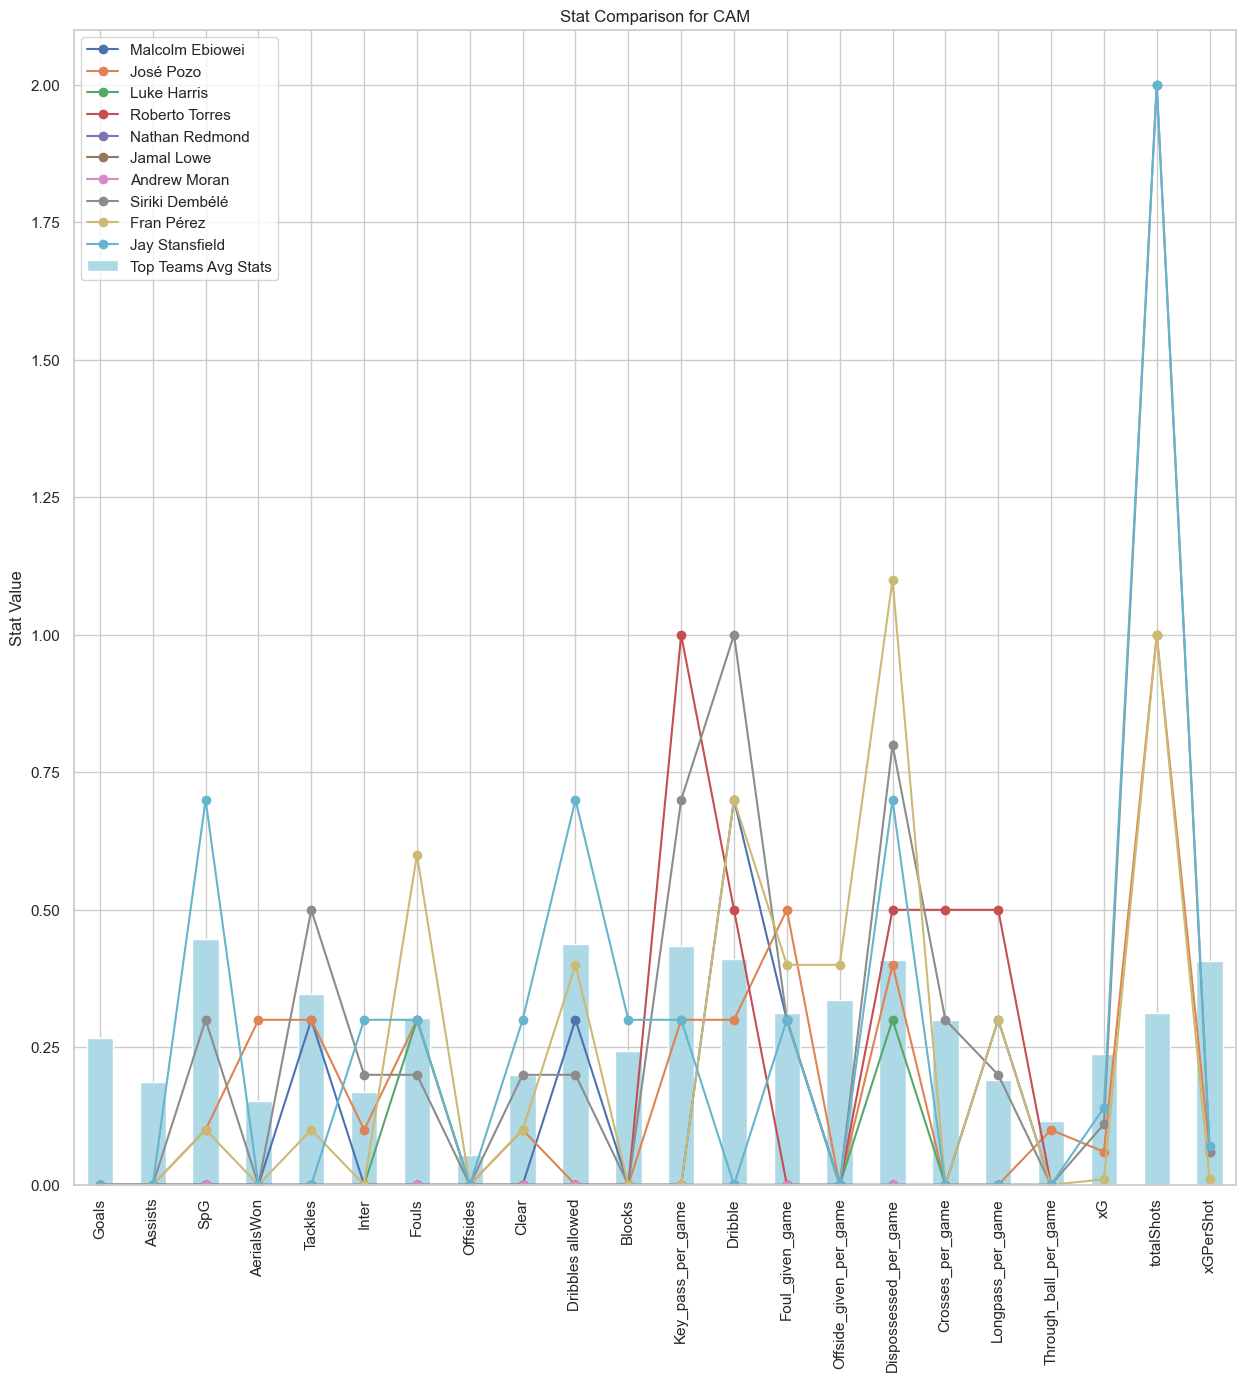

In [15]:
def find_closest_players(df, avg_stats, num_players=10):
    differences = df.apply(lambda row: np.sum((row - avg_stats).abs()), axis=1)
    closest_indices = differences.nsmallest(num_players).index
    return df.loc[closest_indices]

def plot_stats_with_players(top_stats, player_stats, position):
    fig, ax = plt.subplots(figsize=(15, 15))
    
    top_stats.plot(kind='bar', ax=ax, color='lightblue', label='Top Teams Avg Stats')
    
    for idx, row in player_stats.iterrows():
        label = row.get('player_name', f'Player {idx}')
        ax.plot(top_stats.index, row[top_stats.index], marker='o', linestyle='-', label=label)
    
    ax.set_ylabel('Stat Value')
    ax.set_title(f'Stat Comparison for {position}')
    ax.legend()
    
    plt.show()

position = 'CAM'
avg_stats = top_teams_stats[position]
closest_players = find_closest_players(other_teams_df[other_teams_df['position'].str.contains(position, na=False)], avg_stats, num_players=10)

plot_stats_with_players(avg_stats, closest_players, position)